In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

In [42]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [43]:
class AlexNet_CryptGPU(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_CryptGPU, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=9),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(num_features=96),

            nn.Conv2d(96, 256, kernel_size=5, padding=1),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=1),
            nn.BatchNorm2d(num_features=256),
            
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        if num_classes == 10:
            self.fc_layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(256, 256),
                nn.ReLU(inplace=True),
                nn.Linear(256, 256),
                nn.ReLU(inplace=True),
                nn.Linear(256, 10),
            )
        elif num_classes == 200:
            self.fc_layers = nn.Sequential(
                nn.AvgPool2d(kernel_size=2),
                nn.Flatten(),
                nn.Linear(1024, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 200),
            )
        elif num_classes == 1000:
            self.fc_layers = nn.Sequential(
                nn.AvgPool2d(kernel_size=4),
                nn.Flatten(),
                nn.Linear(9216, 4096),
                nn.ReLU(),
                nn.Linear(4096, 4096),
                nn.ReLU(),
                nn.Linear(4096, 1000),
            )

    def forward(self, x):
        x = self.features(x)
        x = self.fc_layers(x)
        return x
    
class AlexNet_Falcon(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_Falcon, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=9),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(num_features=96),

            nn.Conv2d(96, 256, kernel_size=5, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(num_features=256),

            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        if num_classes == 10:
            self.fc_layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(256, 256),
                nn.ReLU(inplace=True),
                nn.Linear(256, 256),
                nn.ReLU(inplace=True),
                nn.Linear(256, 10),
                # nn.ReLU(inplace=True),
            )
        elif num_classes == 200:
            self.fc_layers = nn.Sequential(
                nn.AvgPool2d(kernel_size=2),
                nn.Flatten(),
                nn.Linear(1024, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 200),
            )
        elif num_classes == 1000:
            self.fc_layers = nn.Sequential(
                nn.AvgPool2d(kernel_size=4),
                nn.Flatten(),
                nn.Linear(9216, 4096),
                nn.ReLU(),
                nn.Linear(4096, 4096),
                nn.ReLU(),
                nn.Linear(4096, 1000),
            )

    def forward(self, x):
        x = self.features(x)
        x = self.fc_layers(x)
        return x

class AlexNet_Official(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_Official, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x
    
class AlexNet_Official_modify(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_Official_modify, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            # nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            # nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x

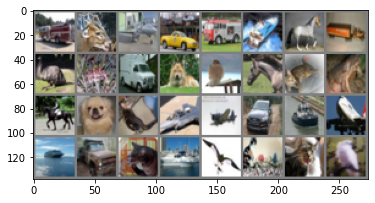

truck  deer plane   car


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [45]:
from tensorboardX import SummaryWriter
logger = SummaryWriter(log_dir = 'log')


model = AlexNet_CryptGPU()
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 
# AlexNet Official
# lr=0.001, momentum=0.9 converges about 2~3 epoch. Without momentum, it does not converge.
# lr=0.01 (remove Dropout) converges about 3~4 epoch.

# AlexNet Official Modified: MaxPooling --> AvgPooing, remove Dropout
# lr=0.01 converges

# AlexNet CryptGPU
# lr=0.01. momentum=0.9 not converge. No BN, remove the last avgpooling layer.

# AlexNet Falcon
# lr=0.01 converges

dataiter = iter(trainloader)
# images, labels = dataiter.next()
it = 10
for epoch in range(it):
    for batch, data in enumerate(trainloader, 0):
        images, labels = data
        output = model(images)

        optimizer.zero_grad()
        loss = criterion(output, labels)
        loss.backward()
        
        optimizer.step()
        if batch % 100 == 0:
            print('Epoch: {}, Batch {}, Loss: {}'.format(epoch, batch, loss.item()))

output = model(images)
_, output = torch.max(output, 1)
print(f"Output: ${output}")
print(f"Target: ${labels}")

AlexNet_CryptGPU(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(9, 9))
    (1): ReLU(inplace=True)
    (2): AvgPool2d(kernel_size=3, stride=2, padding=0)
    (3): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): AvgPool2d(kernel_size=2, stride=1, padding=0)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (